In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib

In [2]:


# Load the DP-protected dataset
dp_df = pd.read_csv("../Data/The_Cancer_data_DP_Protected.csv")
print("DP-Protected dataset loaded successfully!")


DP-Protected dataset loaded successfully!


In [3]:


X_dp = dp_df.drop(columns=['Diagnosis'])  # Features
y_dp = dp_df['Diagnosis']                 # Target variable

X_train_dp, X_test_dp, y_train_dp, y_test_dp = train_test_split(X_dp, y_dp, test_size=0.2, random_state=42)


In [4]:
scaler = StandardScaler()
X_train_dp = scaler.fit_transform(X_train_dp)
X_test_dp = scaler.transform(X_test_dp)

dp_model = LogisticRegression()
dp_model.fit(X_train_dp, y_train_dp)

joblib.dump(dp_model, "../logistic_model_DP.pkl")
joblib.dump(scaler, "../scaler_DP.pkl")


['../scaler_DP.pkl']

Classification Report (DP Model):
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       184
           1       0.89      0.74      0.81       116

    accuracy                           0.86       300
   macro avg       0.87      0.84      0.85       300
weighted avg       0.87      0.86      0.86       300

Confusion Matrix (DP Model):
 [[173  11]
 [ 30  86]]


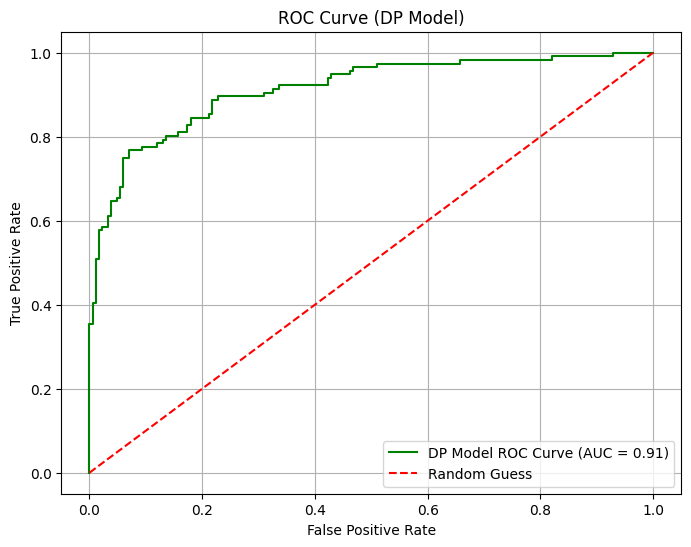

In [5]:


# Predictions
y_pred_dp = dp_model.predict(X_test_dp)
y_prob_dp = dp_model.predict_proba(X_test_dp)[:, 1]

# Metrics
print("Classification Report (DP Model):\n", classification_report(y_test_dp, y_pred_dp))
print("Confusion Matrix (DP Model):\n", confusion_matrix(y_test_dp, y_pred_dp))

# ROC Curve
fpr_dp, tpr_dp, thresholds_dp = roc_curve(y_test_dp, y_prob_dp)
roc_auc_dp = auc(fpr_dp, tpr_dp)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dp, tpr_dp, color='green', label=f"DP Model ROC Curve (AUC = {roc_auc_dp:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title("ROC Curve (DP Model)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [6]:


# Ensure the Data folder exists
data_folder = "../Data/"
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# 1. Save Confusion Matrix as Heatmap Image
def plot_and_save_confusion_matrix(y_test, y_pred, filename):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
    plt.title("Confusion Matrix (DP Model)")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.savefig(os.path.join(data_folder, filename))
    plt.close()
    print(f"Confusion matrix image saved at: {os.path.join(data_folder, filename)}")

# Save Confusion Matrix
plot_and_save_confusion_matrix(y_test_dp, y_pred_dp, "confusion_matrix_dp_model.png")

# 2. Save Classification Report as Heatmap Image
def plot_and_save_classification_report(y_test, y_pred, filename):
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="YlGnBu")  # Exclude "support" column and avg/total row
    plt.title("Classification Report (DP Model)")
    plt.xlabel("Metrics")
    plt.ylabel("Classes")
    plt.tight_layout()
    plt.savefig(os.path.join(data_folder, filename))
    plt.close()
    print(f"Classification report image saved at: {os.path.join(data_folder, filename)}")

# Save Classification Report
plot_and_save_classification_report(y_test_dp, y_pred_dp, "classification_report_dp_model.png")

# 3. Save ROC Curve as Image
def plot_and_save_roc_curve(fpr, tpr, roc_auc, filename):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='green', label=f"DP Model ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
    plt.title("ROC Curve (DP Model)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(data_folder, filename))
    plt.close()
    print(f"ROC curve image saved at: {os.path.join(data_folder, filename)}")

# Save ROC Curve
plot_and_save_roc_curve(fpr_dp, tpr_dp, roc_auc_dp, "roc_curve_dp_model.png")


Confusion matrix image saved at: ../Data/confusion_matrix_dp_model.png
Classification report image saved at: ../Data/classification_report_dp_model.png
ROC curve image saved at: ../Data/roc_curve_dp_model.png
